<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packagesimport numpy as np
import matplotlib.pyplot as plt


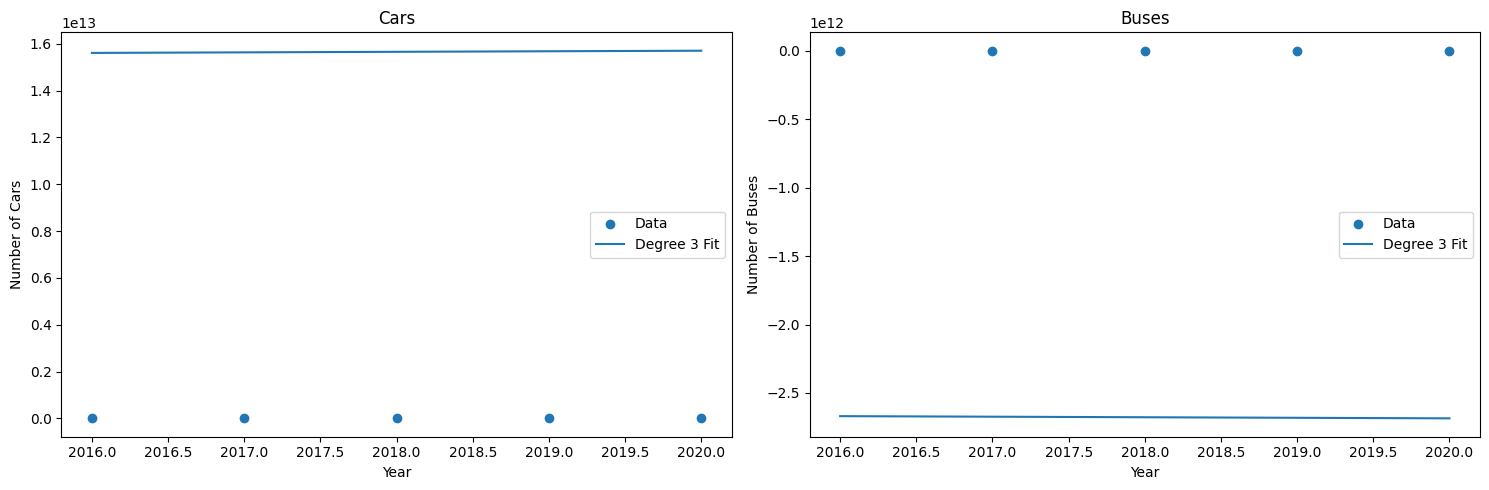

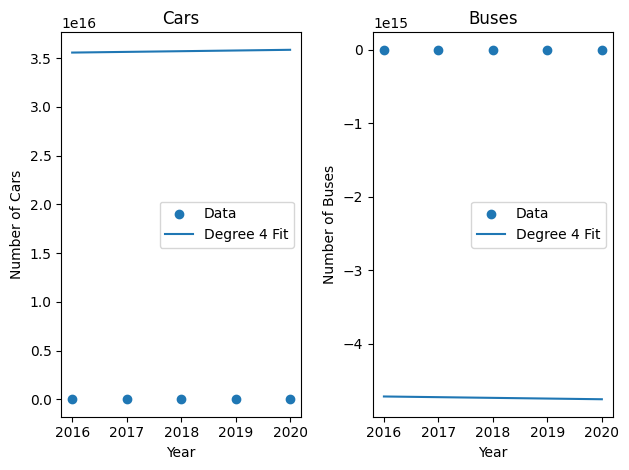

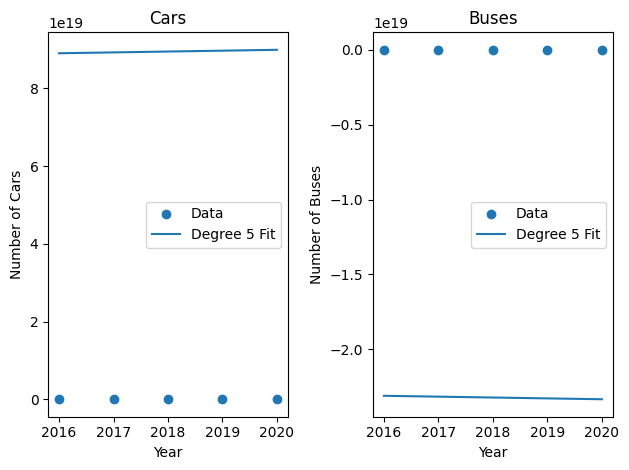

In [7]:
# Given dataset
import numpy as np
import matplotlib.pyplot as plt
years = np.array([2016, 2017, 2018, 2019, 2020])
cars = np.array([19, 20, 23, 26, 30])
buses = np.array([5, 7, 9, 10, 12])

# Function to fit a polynomial of degree K
def fit_polynomial(x, y, degree):
    # Create the Vandermonde matrix
    X = np.vander(x, degree + 1, increasing=True)
    
    # Use least squares to find the coefficients
    coefficients, residuals, _, _ = np.linalg.lstsq(X, y, rcond=None)
    
    return coefficients

# Function to evaluate the polynomial at a given x
def evaluate_polynomial(coefficients, x):
    return np.polyval(coefficients, x)


degrees = [3, 4, 5]

plt.figure(figsize=(15, 5))

for degree in degrees:
 
    cars_coefficients = fit_polynomial(years, cars, degree)
    buses_coefficients = fit_polynomial(years, buses, degree)

  
    cars_prediction = evaluate_polynomial(cars_coefficients, years)
    buses_prediction = evaluate_polynomial(buses_coefficients, years)

  
    plt.subplot(1, 2, 1)
    plt.scatter(years, cars, label='Data')
    plt.plot(years, cars_prediction, label=f'Degree {degree} Fit')
    plt.title('Cars')
    plt.xlabel('Year')
    plt.ylabel('Number of Cars')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(years, buses, label='Data')
    plt.plot(years, buses_prediction, label=f'Degree {degree} Fit')
    plt.title('Buses')
    plt.xlabel('Year')
    plt.ylabel('Number of Buses')
    plt.legend()

    plt.tight_layout()
    plt.show()

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [1]:
import numpy as np

def load_data(file_name):

    data = np.genfromtxt(file_name, delimiter=',', skip_header=1)
    

    x = data[:, 0]
    y = data[:, 1]
    
    # Create a 2D matrix X with x and y as columns
    X = np.column_stack((x, y))
    
    return X

# Example usage:
file_name = 'Image.csv'
X = load_data(file_name)
print(X.shape) 

(599, 2)


- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [2]:
import numpy as np

def kmeans(X, K, max_iters=100):
    n, d = X.shape

   
    M = X[np.random.choice(n, K, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign each data point to the nearest cluster
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        U = (np.argmin(distances, axis=1)[:, np.newaxis] == np.arange(K)).astype(int)

        
        M_new = (U.T @ X) / np.sum(U, axis=0)[:, np.newaxis]

        # Check for convergence
        if np.all(M == M_new):
            break

        M = M_new

    return M, U


K = 3  # Number of clusters
M, U = kmeans(X, K)

# M: Cluster centroids, U: Cluster assignments
print("Cluster Centroids:\n", M)
print("\nCluster Assignments:\n", U)

Cluster Centroids:
 [[ 3.18323493  3.05729396]
 [-0.07057305  0.02795606]
 [-2.13711914  4.12519435]]

Cluster Assignments:
 [[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

C:\Users\RGS-CO\AppData\Local\Temp\ipykernel_17288\1529000241.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=U, cmap='viridis', marker='o', label='Data Points')


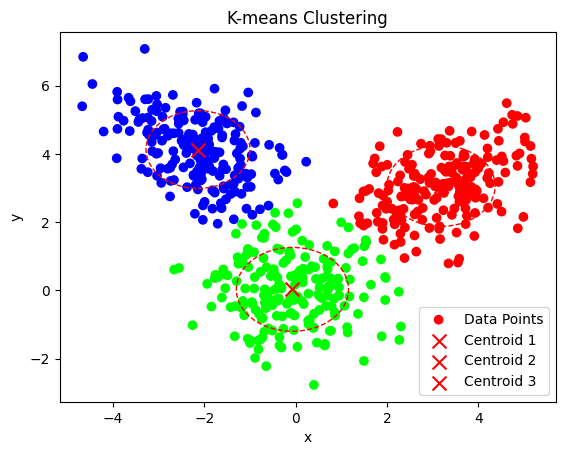

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, M, U):
    K = M.shape[0]

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=U, cmap='viridis', marker='o', label='Data Points')

    # Plot centroids and draw circles around them
    for k in range(K):
        plt.scatter(M[k, 0], M[k, 1], c='red', marker='x', s=100, label=f'Centroid {k + 1}')
        circle = plt.Circle((M[k, 0], M[k, 1]), radius=np.mean(np.linalg.norm(X[U[:, k] == 1] - M[k], axis=1)),
                            color='red', fill=False, linestyle='dashed')
        plt.gca().add_patch(circle)

    # Set labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K-means Clustering')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


plot_clusters(X, M, U)

**<font color="red"> Don't edit the code in the following cell!</font>**

In [1]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image1.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

NameError: name 'load_data' is not defined

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

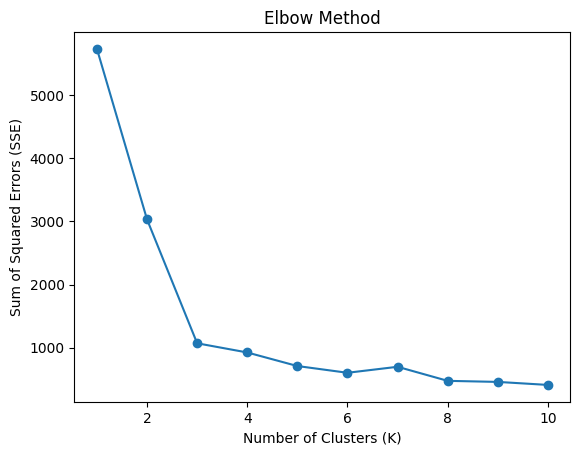

K=1: SSE=5730.581553177783
K=2: SSE=3030.250169922366
K=3: SSE=1069.8025528648386
K=4: SSE=924.435376757609
K=5: SSE=709.7239034286862
K=6: SSE=602.8387926619594
K=7: SSE=697.6421536356067
K=8: SSE=475.21752881837455
K=9: SSE=458.3400959450037
K=10: SSE=410.60927646323114


In [5]:
import matplotlib.pyplot as plt

def elbow_method(X, possible_K_values):
    sse_values = []

    for K in possible_K_values:
       
        M, U = kmeans(X, K)

        # Calculate SSE for the current K
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        sse = np.sum((distances.min(axis=1))**2)
        sse_values.append(sse)

    # Plot SSE versus K
    plt.plot(possible_K_values, sse_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method')
    plt.show()

    return np.array(sse_values)


possible_K_values = range(1, 11) 
sse_values = elbow_method(X, possible_K_values)


for K, sse in zip(possible_K_values, sse_values):
    print(f'K={K}: SSE={sse}')


# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

ImportError: cannot import name 'acyclic_depth_first' from 'nltk.util' (c:\Users\RGS-CO\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\util.py)

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [6]:
# TODO: First 25 rows of the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the actual path to your CSV file
file_path = "path/to/sentiment.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first 25 rows and last 10 rows
    print("First 25 rows:")
    print(df.head(25))
    print("\nLast 10 rows:")
    print(df.tail(10))

    # Print information about all columns
    print("\nData frame information:")
    print(df.info())

    # Plot the histogram of sentiment scores
    plt.hist(df['sentiment'], bins=30, edgecolor='black')
    plt.title('Histogram of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Error: The file 'path/to/sentiment.csv' was not found. Please provide the correct file path.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the actual path to your CSV file
file_path = "path/to/sentiment.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first 25 rows
    print("First 25 rows:")
    print(df.head(25))

    # TODO: Display the last 10 rows
    print("\nTODO: Last 10 rows:")
    print(df.tail(10))

    # Print information about all columns
    print("\nData frame information:")
    print(df.info())

    # Plot the histogram of sentiment scores
    plt.hist(df['sentiment'], bins=30, edgecolor='black')
    plt.title('Histogram of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")



Error: The file 'path/to/sentiment.csv' was not found. Please provide the correct file path.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the actual path to your CSV file
file_path = "path/to/sentiment.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first 25 rows
    print("First 25 rows:")
    print(df.head(25))

    # Display the last 10 rows
    print("\nLast 10 rows:")
    print(df.tail(10))

    # TODO: Print information about all columns
    print("\nTODO: Data frame information:")
    print(df.info())

    # Plot the histogram of sentiment scores
    plt.hist(df['sentiment'], bins=30, edgecolor='black')
    plt.title('Histogram of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")
 

Error: The file 'path/to/sentiment.csv' was not found. Please provide the correct file path.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the actual path to your CSV file
file_path = "path/to/sentiment.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first 25 rows
    print("First 25 rows:")
    print(df.head(25))

    # Display the last 10 rows
    print("\nLast 10 rows:")
    print(df.tail(10))

    # Print information about all columns
    print("\nData frame information:")
    print(df.info())

    # TODO: Plot the histogram of sentiment scores
    plt.hist(df['sentiment'], bins=30, edgecolor='black')
    plt.title('TODO: Histogram of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Error: The file 'path/to/sentiment.csv' was not found. Please provide the correct file path.


Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [10]:
def preprocess_text(text):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)
    
    # Create a set of stop-words
    stop_words = set(stopwords.words('english'))
    
    # Remove stop-words
    text = " ".join(word for word in text.split() if word not in stop_words)
    
    # Return the preprocessed text as a string
    return text 
    

In [20]:
import re
from string import punctuation
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)
    
    # Remove stopwords using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    
    # Return the preprocessed text as a string
    return " ".join(tokens)

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


file_path = "sentiment.csv"  
df = pd.read_csv(file_path)

# Print the column names to identify the correct column name
print("Column names:", df.columns)


# Extract features using Bag-of-Words
corpus = df['preprocessed_text'].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense_array = X.toarray()

# Display the results
print("Feature names (Vocabulary):", feature_names)
print("Dense array representation:")
print(dense_array)



Column names: Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')
Feature names (Vocabulary): ['10' '100' '100minute' ... 'zhuangzhuang' 'zingers' 'zip']
Dense array representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO: Assuming 'Sentiment' is the target variable
X = dense_array  # Features obtained from Bag-of-Words
y = df['Sentiment']

# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Make predictions on the testing set
y_pred = model.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)


Mean Squared Error: 3.150029373152089e+25


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

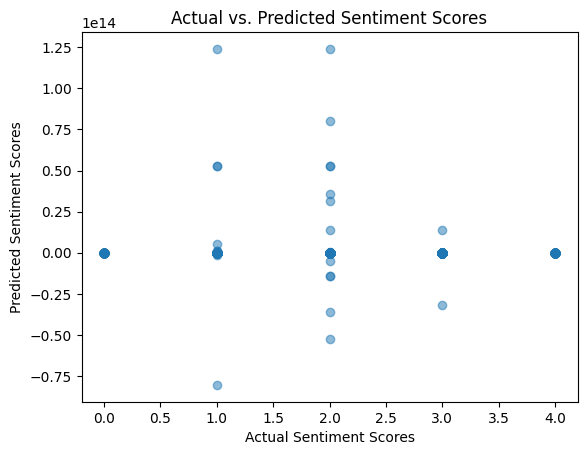

In [34]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted sentiment scores
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Sentiment Scores')
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.show()


## <font color="red"> Discuss the resulted figure </font>

...

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [35]:
import numpy as np


vocabulary = set(word for sentence in corpus for word in sentence.split())

# Step 2: Create a feature matrix
feature_matrix = np.zeros((len(corpus), len(vocabulary)))

# Step 3: Populate the feature matrix
for i, sentence in enumerate(corpus):
    for j, word in enumerate(vocabulary):
        feature_matrix[i, j] = sentence.split().count(word)

# Display the results
print("Vocabulary:", list(vocabulary))
print("Feature Matrix:")
print(feature_matrix)


Vocabulary: ['coolness', 'duds', 'mythic', 'aborted', 'bluescreen', 'mary', 'power', 'guys', 'face', 'explore', 'kung', 'feces', 'gives', 'chabrol', 'genuinely', 'early', 'accurate', 'conclusion', 'skims', 'list', 'dialogue', 'fantasia', 'chance', 'instantly', 'shell', 'narratively', 'director', 'occurs', 'bogged', 'heat', 'leigh', 'moviegoers', 'complaint', 'whitewash', 'ego', 'vulgar', 'amiable', 'gratuitous', 'passionate', 'chemicals', 'times', 'gorgeous', 'avoids', 'mood', 'q', 'sympathetic', 'distractions', 'evokes', 'oedekerk', 'reek', 'russian', 'shiner', 'deep', 'elements', 'relative', 'man', 'tackled', 'harrison', 'swordfights', 'jolting', 'observed', 'let', 'childhood', 'hell', 'told', 'lust', 'fatal', 'filmmaking', 'hews', 'contact', 'tax', 'involved', 'indication', 'setting', 'fortunately', 'pay', 'mention', 'proficiency', 'lie', 'rewrite', 'weird', 'trembling', 'emphasis', 'film', 'masterpiece', 'combines', 'vat', 'hot', 'kind', 'selfsatisfaction', 'overall', 'ode', 'swayi